## 알고리즘 예제4.11, 12

문제 정의 : 축소 정복 기법을 이용한 k번째 작은 수 찾기 + 리스트 분할(Hoare Partition)

알고리즘 설명

11번 

1. 리스트 A의 left에서 right 사이의 항목을 분할한다. 이때 분할의 기준이 되는 항목의 인덱스가 반환된다. 

2. 피벗의 인덱스 pos+1이 left+k와 같으면 전체 리스트 A에서 left+k번째 작은 항목을 찾은 것이다. 이때 순환호출에 의해 매개변수 k가 점점 줄어드는 것에 유의하라. 원래 찾고자 한 수는 이제 k번째가 아니라 부분 리스트의 시작 인덱스 +k번째, 즉 left+k번째 항목이다.

3. 만약 pos+1이 left+k보다 크면 답은 왼쪽 부분 리스트에 있다.

4. 그렇지 않으면 답은 오른쪽 부분 리스트에 있다. 이제 오른쪽 부분 리스트에서 k번째 수를 찾는 것이 아니라 k-(pos+1-left)번째를 찾아야 한다. 

12번 

1. low, high와 피벗의 위치 pivot을 설정한다. 피벗은 첫 번째 항목으로 선택하였다. 

2. low 와 high가 역전되지 않는 동안 항목의 크기가 피벗을 기준으로 반대인 위치까지 이동한다. low는 증가, high는 감소 방향으로 탐색한다. 

3. 선택된 두 레코드를 교환한다.

4. 최종적으로 high와 피벗의 항목을 교환하고, high(피벗의 인덱스)를 반환한다.

손으로 푼 예제 : 

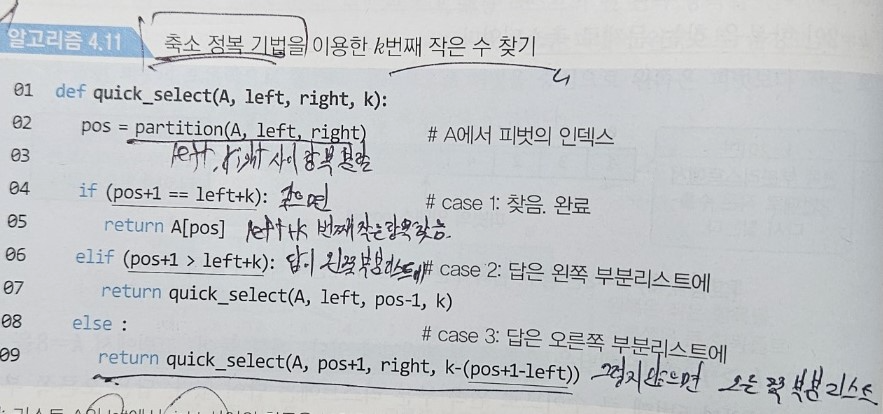
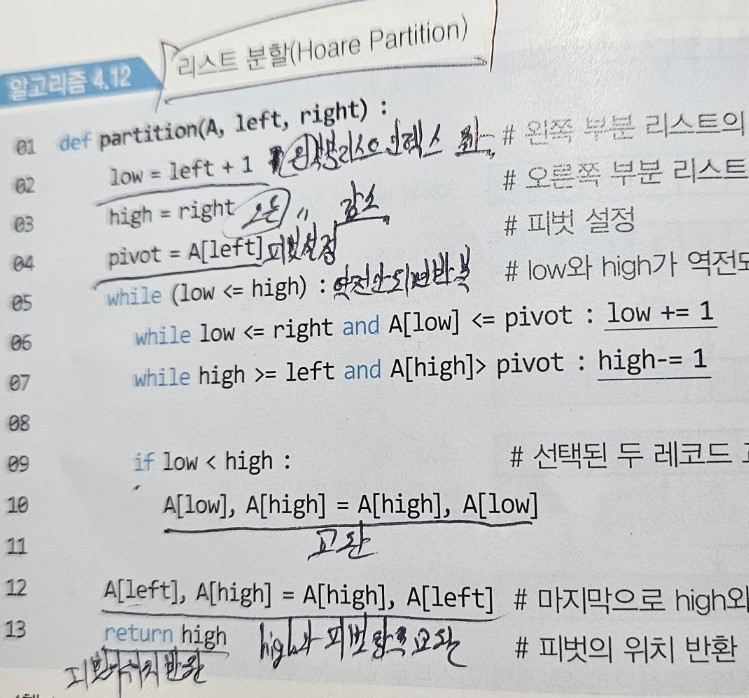

코드 개요 : 축소 정복 기법 함수(quick_select(A, left, right, k)), 리스트 분할 (partition(A, left, right))

입력 변수 : array = [11, 5 ,7, 8, 19, 17, 25, 20]

출력 변수 : quick_select(array, 0, n-1, 3), quick_select(array, 0, n-1, 6)

In [1]:
#알고리즘 코드

def quick_select(A, left, right, k):
    pos = partition(A,left,right)
    
    if (pos+1 == left+k):
        return A[pos]
    elif (pos+1 > left+k):
        return quick_select(A,left,pos-1,k)
    else :
        return quick_select(A, pos+1, right, k-(pos+1-left))   

def partition(A, left, right) :
    low = left + 1
    high = right
    pivot = A[left]
    while (low <= high) :
        while low <= right and A[low] <= pivot : low += 1
        while high >= left and A[high]> pivot : high-= 1
        
        if low < high :
            A[low], A[high] = A[high], A[low]
            
    A[left], A[high] = A[high], A[left]
    return high

In [3]:
#테스트 코드

array = [11, 5 ,7, 8, 19, 17, 25, 20]
print("입력 리스트 =", array)
n = len(array)
print("[축소정복] 3번째 작은 수: ", quick_select(array, 0, n-1, 3))
print("[축소정복] 6번째 작은 수: ", quick_select(array, 0, n-1, 6))

입력 리스트 = [11, 5, 7, 8, 19, 17, 25, 20]
[축소정복] 3번째 작은 수:  8
[축소정복] 6번째 작은 수:  19


수행 결과 

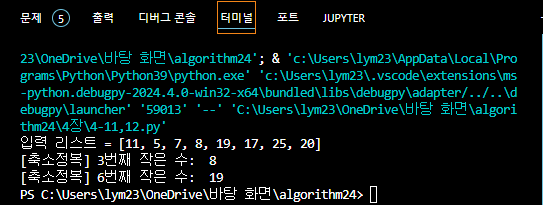

복잡도 분석

평균적인 경우는 "평균"에 대한 어떤 가정이 필요하고 계산하기 어렵다. 복잡한 과정을 거치면 결국, quick_select()의 평균적인 시간 복잡도가 O(n)로 알려져 있다. 